In [43]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [44]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.5,), (0.5,))
])

In [45]:
train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset= datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [46]:
train = DataLoader(train_dataset, batch_size=64,shuffle=True)
test = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [47]:
images, labels = next(iter(train))
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [48]:
classes = train_dataset.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


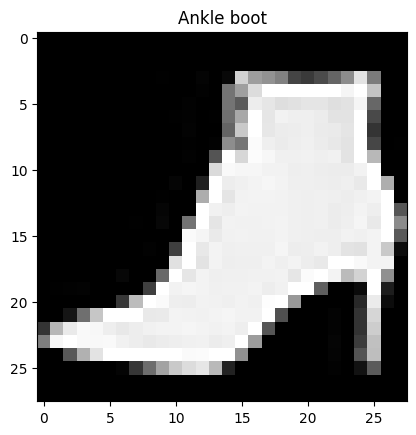

In [49]:
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(classes[labels[0]])
plt.show()

In [50]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128,10)
        )
    def forward(self, x):
            return self.model(x)

In [51]:
model = MLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:
epochs = 5

for epoch in range(epochs):
    model.train()

    for images, labels in train:

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} complete")

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete


In [54]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
accuracy = 100*correct/total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 86.86%


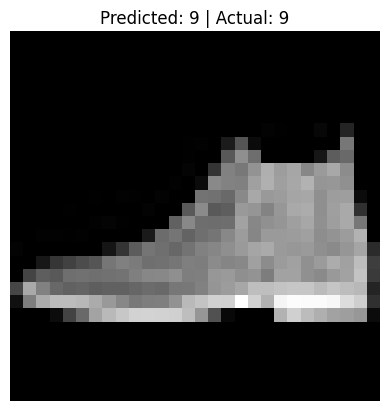

In [59]:
import matplotlib.pyplot as plt

model.eval()

images, labels = next(iter(test))

# Pick one image
img = images[0]
label = labels[0]

# Get prediction
with torch.no_grad():
    output = model(img.unsqueeze(0))   # add batch dimension
    _, predicted = torch.max(output, 1)

# Plot image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted.item()} | Actual: {label.item()}")
plt.axis("off")
plt.show()